# Car Price Prediction With Machine Learning (Task-3)

### - Priyanshu Jha 

In [15]:
# importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Load the Dataset
cars = pd.read_csv('car_details.csv')

cars_new = cars.copy()

In [17]:
cars.shape

(205, 26)

In [18]:
cars.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
148,149,0,subaru dl,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013.0
110,111,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0
43,44,0,isuzu MU-X,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785.0
161,162,0,toyota corolla,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,28,34,8358.0
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018.0


In [19]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [21]:
#checking for Null Values
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [22]:
cars['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [23]:
# Replace string values in the "cylindernumber" column
cars['cylindernumber'] = cars['cylindernumber'].replace({
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "eight": 8,
    "twelve": 12
})

In [24]:
# Convert categorical variables into numerical representations
label_encoder = LabelEncoder()

cars['CarName'] = label_encoder.fit_transform(cars['CarName'])
cars['fueltype'] = label_encoder.fit_transform(cars['fueltype'])
cars['aspiration'] = label_encoder.fit_transform(cars['aspiration'])
cars['doornumber'] = label_encoder.fit_transform(cars['doornumber'])
cars['carbody'] = label_encoder.fit_transform(cars['carbody'])
cars['drivewheel'] = label_encoder.fit_transform(cars['drivewheel'])
cars['enginelocation'] = label_encoder.fit_transform(cars['enginelocation'])
cars['fuelsystem'] = label_encoder.fit_transform(cars['fuelsystem'])
cars['enginetype'] = label_encoder.fit_transform(cars['enginetype'])

In [25]:
cars.dtypes

car_ID                int64
symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int64
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

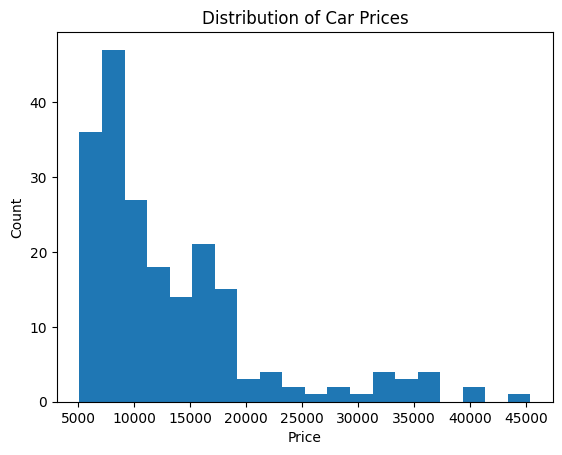

In [26]:
# Visualize the distribution of the target variable (price)
plt.hist(cars['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

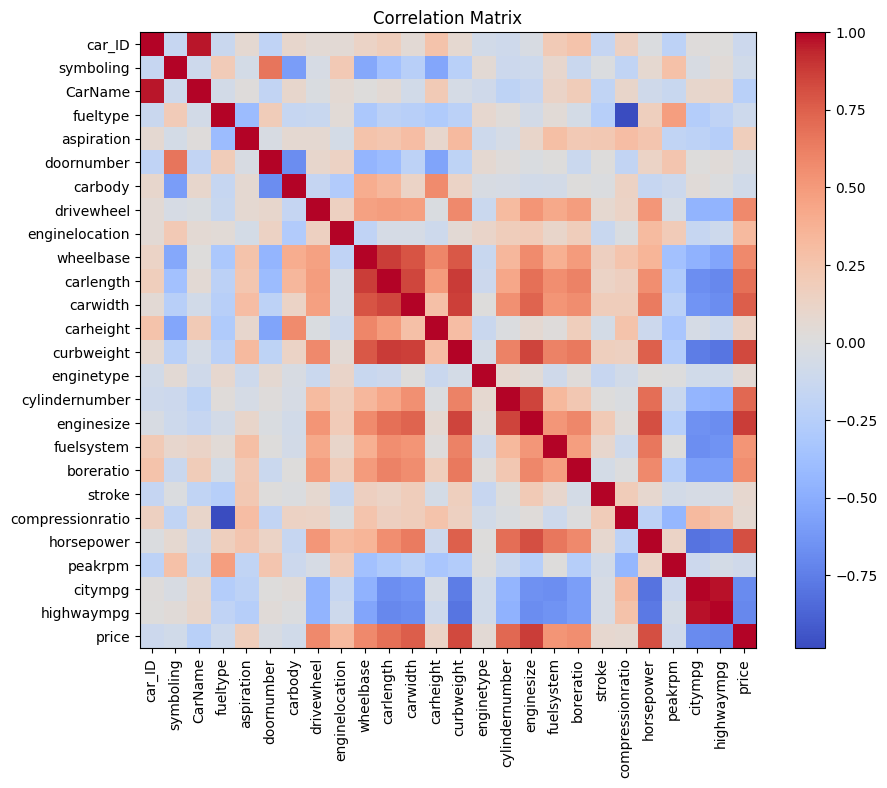

In [27]:
# Correlation matrix and heatmap
correlation_matrix = cars.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [28]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

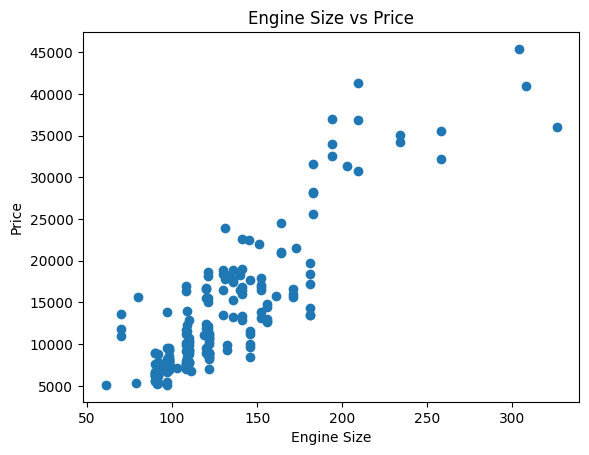

In [29]:
# Scatter plot between two variables (e.g., engine size and price)
plt.scatter(cars['enginesize'], cars['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs Price')
plt.show()

<Axes: xlabel='curbweight', ylabel='price'>

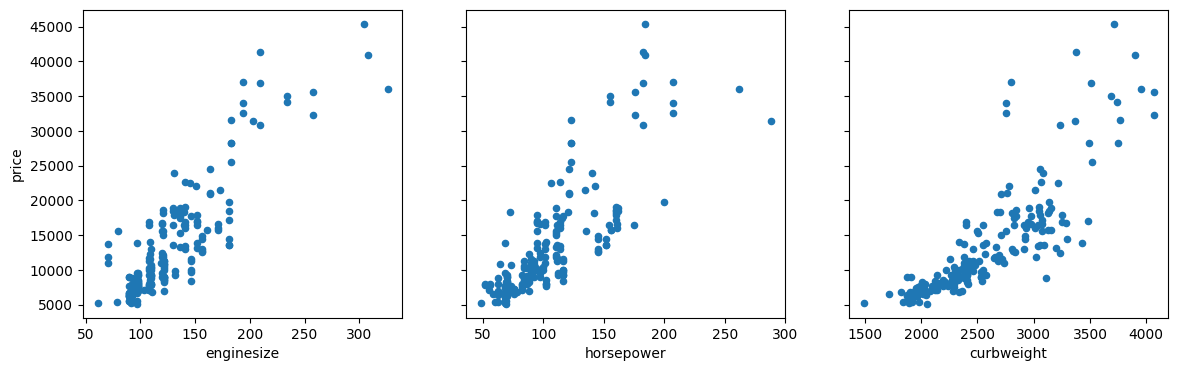

In [30]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(14, 4))
cars.plot(kind="scatter", x='enginesize', y='price', ax=axs[0])
cars.plot(kind="scatter", x='horsepower', y='price', ax=axs[1])
cars.plot(kind="scatter", x='curbweight',y='price', ax=axs[2])

<Axes: xlabel='highwaympg', ylabel='price'>

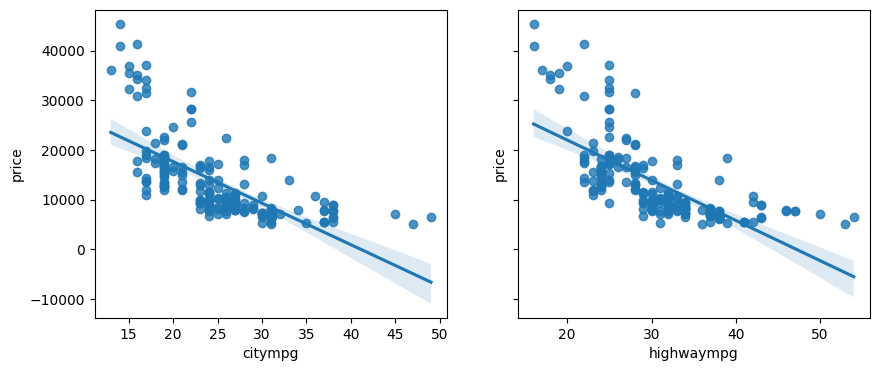

In [31]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,4))
sns.regplot(x='citympg', y='price', data=cars, ax=axs[0])
sns.regplot(x='highwaympg', y='price', data=cars, ax=axs[1])

In [32]:
# Split the data into input features (X) and target variable (y)
# X = cars.drop(columns=['price'])      # r2_score = 0.93
# y = cars['price']

In [33]:
# drop columns not affecting Car Price
col_to_drop = ['car_ID', 'symboling', 'CarName', 'fueltype', 'peakrpm', 'price']    # r2_score decreased

# Split the data into input features (X) and target variable (y)
X = cars.drop(columns=col_to_drop,)
y = cars['price']

In [34]:
X.shape

(205, 20)

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [36]:
# Initialize the Random Forest regressor
rf = RandomForestRegressor()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [37]:
# print y_test
y_test.values

array([ 9298.,  7775.,  5572.,  7299.,  8921.,  6575.,  6189.,  8013.,
        6849.,  5399., 12629.,  9279., 13950., 11048.,  7295.,  9988.,
        5195., 12940.,  7999., 13860., 11248., 16503.,  8058., 20970.,
        6229., 11900., 12945., 15750.,  6479., 45400.,  7395.,  7957.,
        7898., 11549., 16558.,  9538., 17199.,  6918.,  5118.,  9495.,
       21105., 35056., 10595., 17710.,  7788., 16500., 18950.,  6855.,
        8249.,  6649.,  6938.,  7609., 22018.,  6692.,  6785.,  9233.,
        7995., 40960.,  8949., 32528., 12764.,  6488.])

In [38]:
# compare it with y_pred
y_pred

array([11323.07833333,  7864.29      ,  5769.24      ,  6975.345     ,
        9325.19      ,  8531.41      ,  6461.48      , 11865.01      ,
        6979.235     ,  5674.98      , 14494.09      ,  9513.215     ,
       10100.15      , 15086.77500333,  7492.7       , 10599.25166667,
        6221.34      , 15613.02      ,  7539.405     , 16810.73      ,
       10646.635     , 18464.49336   ,  8468.795     , 16785.185     ,
        6495.515     , 15794.05      , 12690.43      , 16510.98      ,
        5603.96      , 35819.165     ,  6754.08      ,  7901.04      ,
        8182.69      , 14352.86667   , 16532.06002   , 11541.27333333,
       18452.10501   ,  7818.84      ,  7167.71      ,  9412.22666667,
       16870.215     , 35009.545     ,  9269.28166667, 19568.94      ,
        7723.63      , 15378.54      , 17349.14167   ,  6628.7       ,
        7373.17      ,  6768.095     ,  7736.265     ,  7484.72      ,
       15660.36167   ,  7179.57      , 10956.51833333, 11589.18      ,
      

Evaluate the Model

In [39]:
# calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 2415.219943683226


In [40]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9134853698755426
